In [ ]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


3.1 Problem-1

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/Datasets/south_asia_happiness.csv'
df = pd.read_csv(file_path)

# Dataset Overview
# 1. Display the first 10 rows
print("First 10 rows of the dataset:")
print(df.head(10))

# 2. Identify the number of rows and columns
print(f"\nNumber of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")

# 3. List all columns and their data types
print("\nColumns and their data types:")
print(df.dtypes)

# Basic Statistics
# 1. Calculate mean, median, and standard deviation for the Score column
print("\nBasic statistics for the Score column:")
print(f"Mean: {df['score'].mean()}")
print(f"Median: {df['score'].median()}")
print(f"Standard Deviation: {df['score'].std()}")

# 2. Identify the country with the highest and lowest happiness scores
highest_score_country = df.loc[df['score'].idxmax(), 'Country name']
lowest_score_country = df.loc[df['score'].idxmin(), 'Country name']
print(f"\nCountry with the highest happiness score: {highest_score_country}")
print(f"Country with the lowest happiness score: {lowest_score_country}")

# Missing Values
# 1. Check for missing values
print("\nChecking for missing values:")
missing_values = df.isnull().sum()
print(missing_values)

# Filtering and Sorting
# 1. Filter dataset for countries with Score > 7.5
filtered_df = df[df['score'] > 7.5]
print(f"\nCountries with Score > 7.5: {filtered_df.shape[0]} entries")

# 2. Sort by GDP per Capita in descending order and display top 10 rows
sorted_df = filtered_df.sort_values(by='Log GDP per capita', ascending=False)
print("\nTop 10 countries by GDP per Capita (Score > 7.5):")
print(sorted_df.head(10))

# Adding New Columns
# 1. Create Happiness Category based on Score
def happiness_category(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'

df['Happiness Category'] = df['score'].apply(happiness_category)
print("\nDataset with Happiness Category added:")
print(df[['Country name', 'score', 'Happiness Category']].head(10))



First 10 rows of the dataset:
  Country name  score  Log GDP per capita  Social support  \
0        Nepal  5.158               0.965           0.990   
1     Pakistan  4.657               1.069           0.600   
2        India  4.054               1.166           0.653   
3    Sri Lanka  3.898               1.361           1.179   
4   Bangladesh  3.886               1.122           0.249   
5  Afghanistan  1.721               0.628           0.000   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.443                         0.653       0.209   
1                    0.321                         0.542       0.144   
2                    0.417                         0.767       0.174   
3                    0.586                         0.583       0.144   
4                    0.513                         0.775       0.140   
5                    0.242                         0.000       0.091   

   Perceptions of corruption  Dystopi

3.1 problem-2

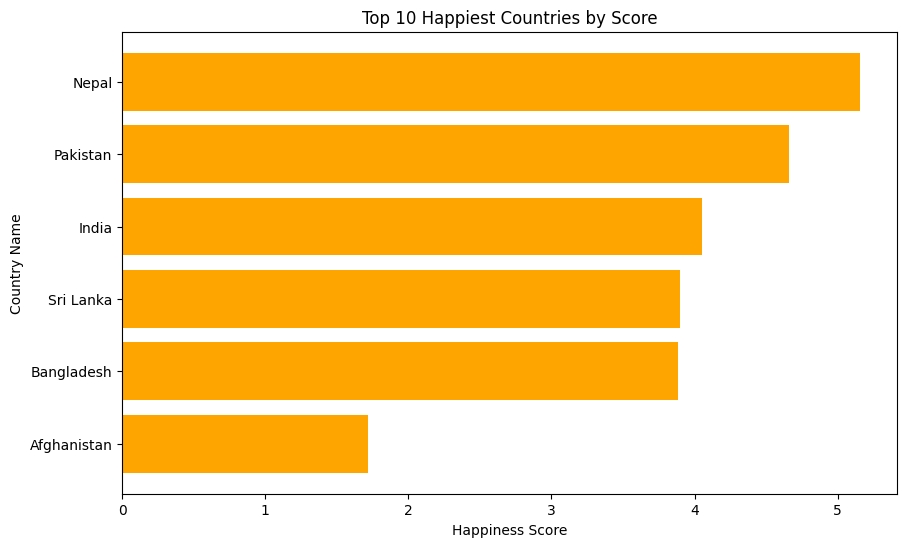

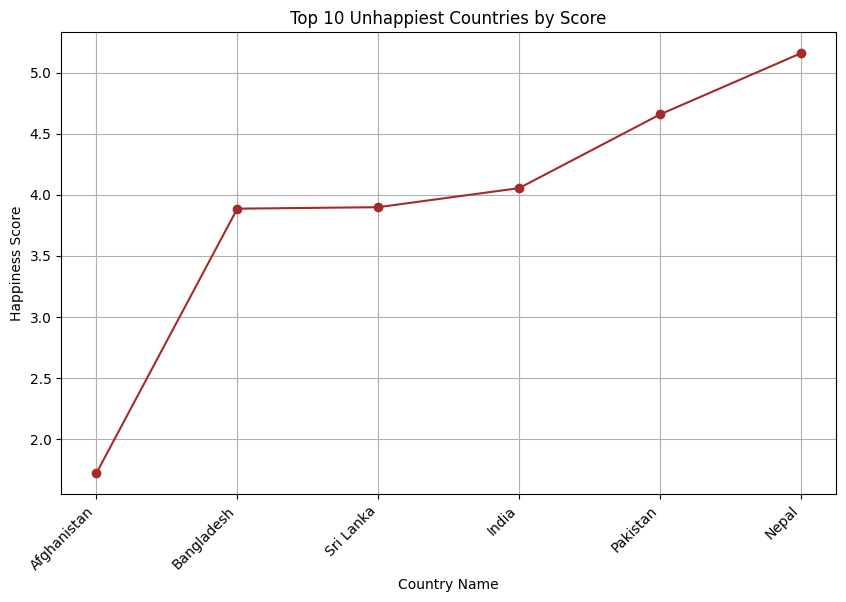

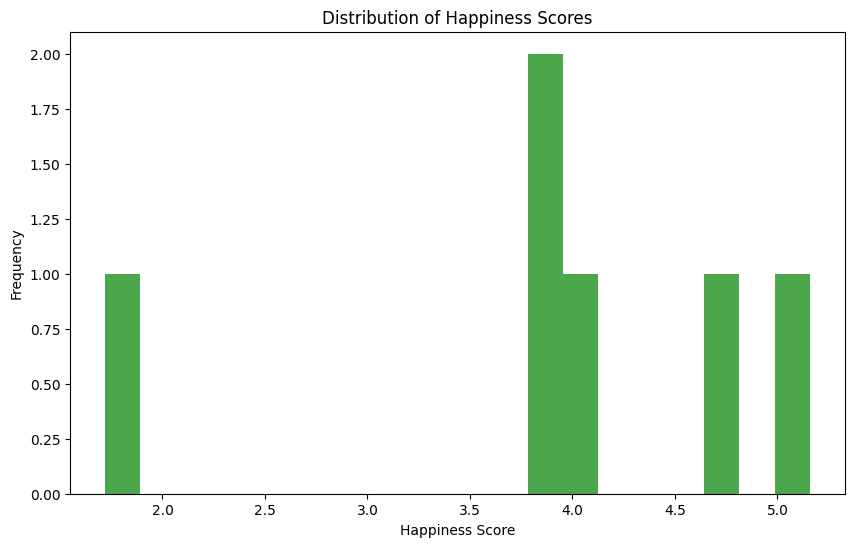

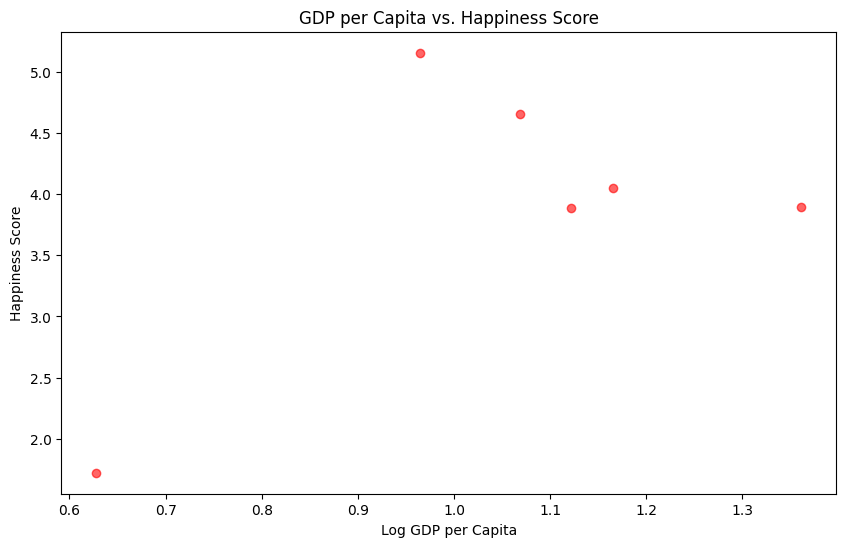

In [ ]:
import matplotlib.pyplot as plt

# Bar Plot: Top 10 Happiest Countries by Score
top_10_happiest = df.nlargest(10, 'score')
plt.figure(figsize=(10, 6))
plt.barh(top_10_happiest['Country name'], top_10_happiest['score'], color='orange')
plt.title('Top 10 Happiest Countries by Score')
plt.xlabel('Happiness Score')
plt.ylabel('Country Name')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

# Line Plot: Top 10 Unhappiest Countries by Score
top_10_unhappiest = df.nsmallest(10, 'score')
plt.figure(figsize=(10, 6))
plt.plot(top_10_unhappiest['Country name'], top_10_unhappiest['score'], marker='o', color='brown')
plt.title('Top 10 Unhappiest Countries by Score')
plt.xlabel('Country Name')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45, ha='right')
plt.grid()
plt.show()

# Histogram: Distribution of Scores
plt.figure(figsize=(10, 6))
plt.hist(df['score'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

# Scatter Plot: GDP per Capita vs. Happiness Score
plt.figure(figsize=(10, 6))
plt.scatter(df['Log GDP per capita'], df['score'], c='red', alpha=0.6)
plt.title('GDP per Capita vs. Happiness Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()

3.2 problem-2, task-1

In [ ]:
# Define the list of South Asian countries
south_asian_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

# Filter the dataset for South Asian countries
south_asia_df = df[df['Country name'].isin(south_asian_countries)]

# Display the filtered dataset
print("South Asia Dataset:")
print(south_asia_df)

# Save the filtered dataset as a separate CSV file
output_file_path = '/content/drive/MyDrive/Datasets/south_asia_happiness.csv'
south_asia_df.to_csv(output_file_path, index=False)
print(f"Filtered dataset saved to {output_file_path}")

South Asia Dataset:
  Country name  score  Log GDP per capita  Social support  \
0        Nepal  5.158               0.965           0.990   
1     Pakistan  4.657               1.069           0.600   
2        India  4.054               1.166           0.653   
3    Sri Lanka  3.898               1.361           1.179   
4   Bangladesh  3.886               1.122           0.249   
5  Afghanistan  1.721               0.628           0.000   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.443                         0.653       0.209   
1                    0.321                         0.542       0.144   
2                    0.417                         0.767       0.174   
3                    0.586                         0.583       0.144   
4                    0.513                         0.775       0.140   
5                    0.242                         0.000       0.091   

   Perceptions of corruption  Dystopia + residu

3.2 task-2

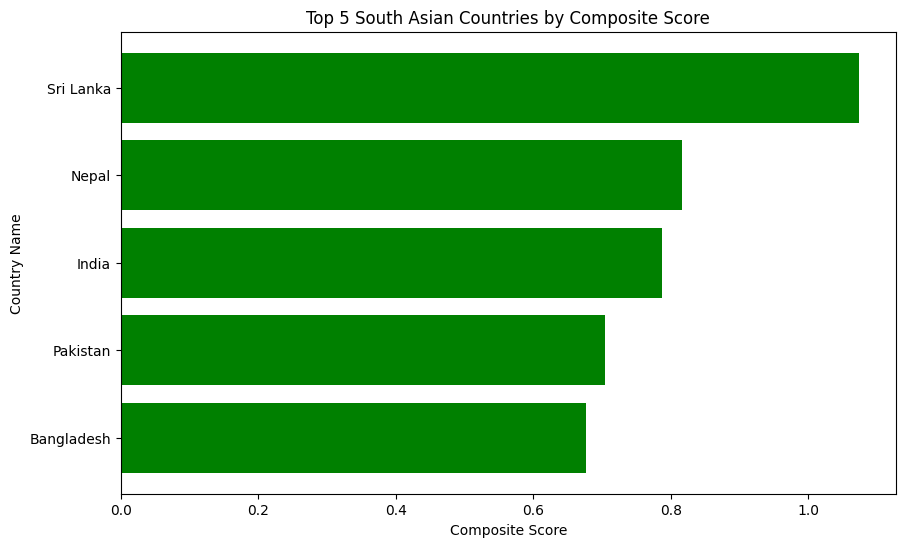

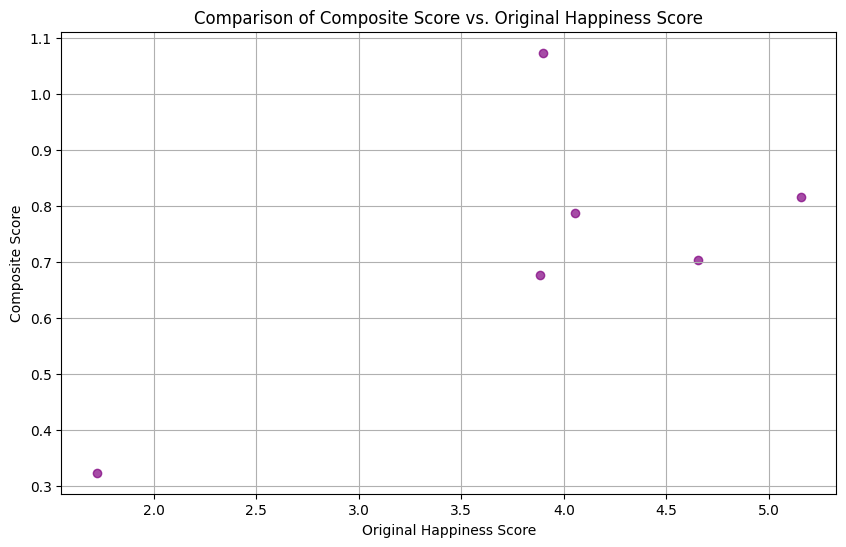

South Asian Countries: Composite vs. Original Score Rankings
  Country name  score  Composite Score  Rank Difference
3    Sri Lanka  3.898           1.0739              3.0
0        Nepal  5.158           0.8159             -1.0
2        India  4.054           0.7874              0.0
1     Pakistan  4.657           0.7039             -2.0
4   Bangladesh  3.886           0.6774              0.0
5  Afghanistan  1.721           0.3238              0.0


In [ ]:
import matplotlib.pyplot as plt

# Calculate Composite Score
south_asia_df['Composite Score'] = (
    0.40 * south_asia_df['Log GDP per capita'] +
    0.30 * south_asia_df['Social support'] +
    0.30 * south_asia_df['Healthy life expectancy']
)

# Rank countries based on Composite Score
south_asia_df = south_asia_df.sort_values(by='Composite Score', ascending=False)

# Visualize the top 5 countries with a horizontal bar chart
top_5_composite = south_asia_df.nlargest(5, 'Composite Score')
plt.figure(figsize=(10, 6))
plt.barh(top_5_composite['Country name'], top_5_composite['Composite Score'], color='green')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Country Name')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

# Compare Composite Score with Original Score using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(south_asia_df['score'], south_asia_df['Composite Score'], color='purple', alpha=0.7)
plt.title('Comparison of Composite Score vs. Original Happiness Score')
plt.xlabel('Original Happiness Score')
plt.ylabel('Composite Score')
plt.grid()
plt.show()

# Analyze rank differences between Composite Score and Original Score
south_asia_df['Rank Difference'] = (
    south_asia_df['score'].rank(ascending=False) - south_asia_df['Composite Score'].rank(ascending=False)
)

# Display the analysis
print("South Asian Countries: Composite vs. Original Score Rankings")
print(south_asia_df[['Country name', 'score', 'Composite Score', 'Rank Difference']])

3.2 task-3

Outlier Countries based on Score and GDP per Capita:
  Country name  score  Log GDP per capita
5  Afghanistan  1.721               0.628


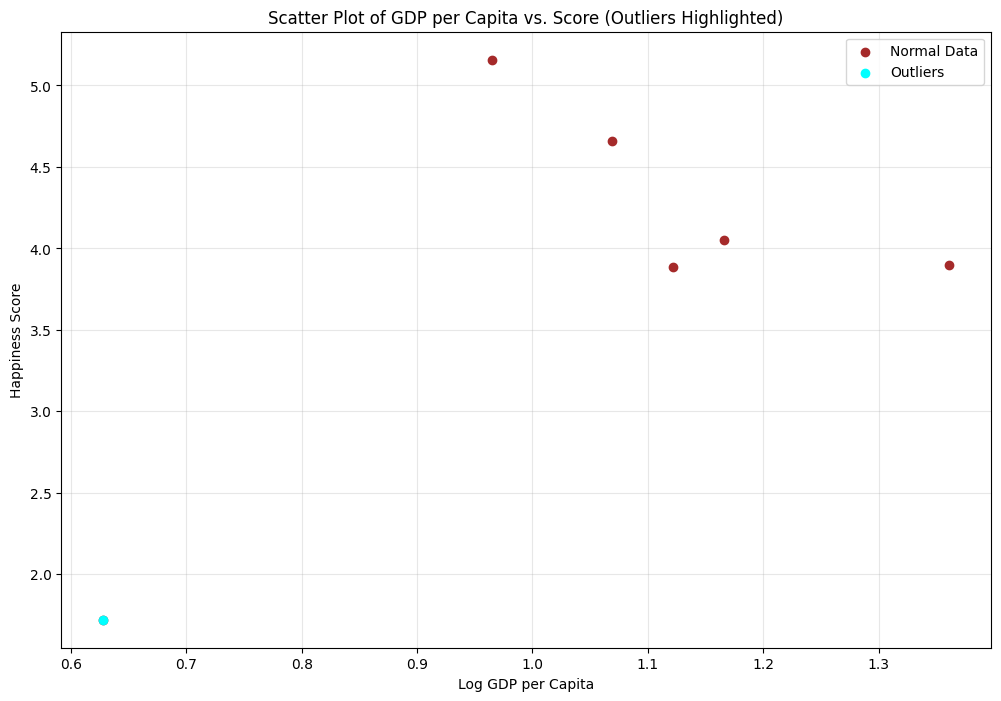


Discussion:
The identified outlier countries are those with scores or GDP per capita values that fall outside the 1.5 × IQR range.
These outliers can significantly impact regional averages by skewing the data. High outliers may elevate the average,
while low outliers may depress it. Understanding these outliers is important for more accurate regional analysis.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to detect outliers using the 1.5 * IQR rule
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Identify outliers for 'score' and 'Log GDP per capita'
score_outliers = detect_outliers(south_asia_df, 'score')
gdp_outliers = detect_outliers(south_asia_df, 'Log GDP per capita')

# Combine the unique outlier countries
outlier_countries = pd.concat([score_outliers, gdp_outliers]).drop_duplicates()

# Display outliers
print("Outlier Countries based on Score and GDP per Capita:")
print(outlier_countries[['Country name', 'score', 'Log GDP per capita']])

# Create a scatter plot highlighting outliers
plt.figure(figsize=(12, 8))
plt.scatter(south_asia_df['Log GDP per capita'], south_asia_df['score'], color='brown', label='Normal Data')
plt.scatter(outlier_countries['Log GDP per capita'], outlier_countries['score'], color='cyan', label='Outliers')

plt.title('Scatter Plot of GDP per Capita vs. Score (Outliers Highlighted)')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Discussion of characteristics and potential impact
print("\nDiscussion:")
print("The identified outlier countries are those with scores or GDP per capita values that fall outside the 1.5 × IQR range.")
print("These outliers can significantly impact regional averages by skewing the data. High outliers may elevate the average,")
print("while low outliers may depress it. Understanding these outliers is important for more accurate regional analysis.")

3.2 task-4

Pearson Correlation with Score:
Freedom to make life choices: 0.80
Generosity: 0.87


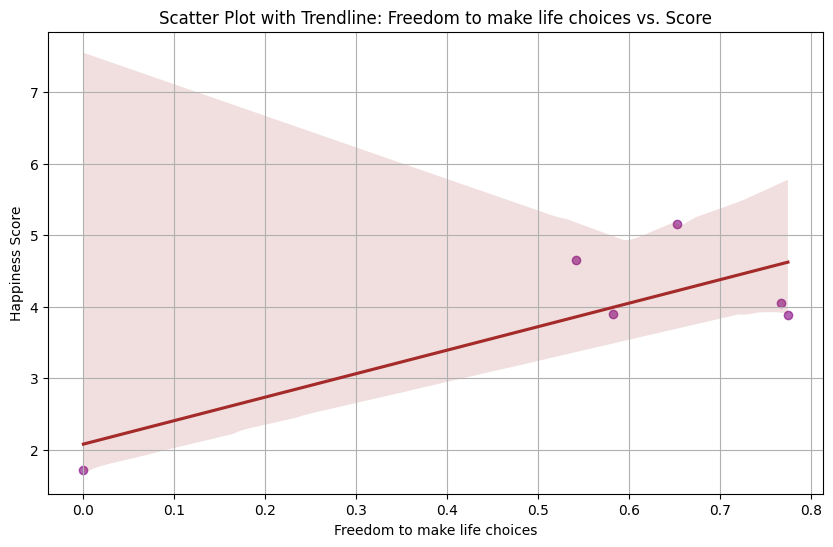

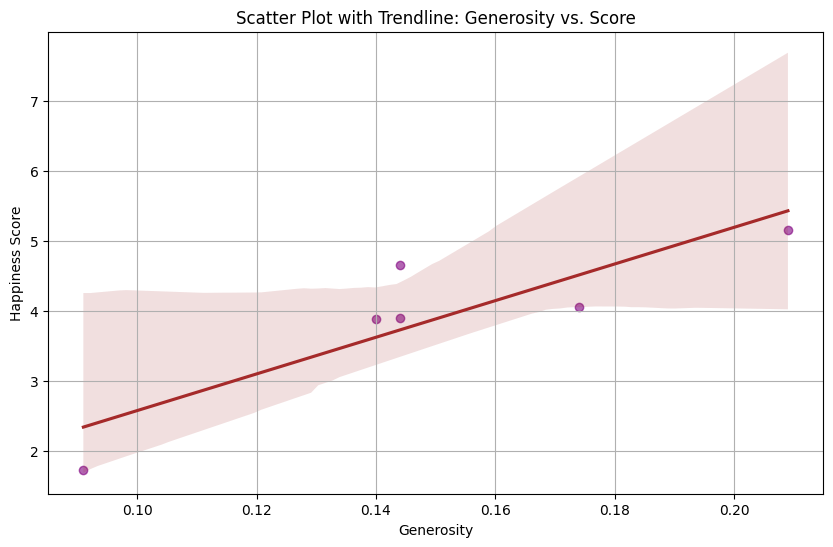

The strongest relationship is between 'Generosity' and the score, with a correlation of 0.87.
The weakest relationship is between 'Freedom to make life choices' and the score, with a correlation of 0.80.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Calculate Pearson correlation
metrics = ['Freedom to make life choices', 'Generosity']
correlations = {metric: south_asia_df['score'].corr(south_asia_df[metric]) for metric in metrics}

# Display correlation results
print("Pearson Correlation with Score:")
for metric, corr_value in correlations.items():
    print(f"{metric}: {corr_value:.2f}")

# Step 2: Scatter plots with trendlines
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.regplot(
        x=south_asia_df[metric],
        y=south_asia_df['score'],
        scatter_kws={'color': 'purple', 'alpha': 0.6},
        line_kws={'color': 'brown'}
    )
    plt.title(f'Scatter Plot with Trendline: {metric} vs. Score')
    plt.xlabel(metric)
    plt.ylabel('Happiness Score')
    plt.grid()
    plt.show()

# Step 3: Discuss the strongest and weakest relationships
strongest_metric = max(correlations, key=correlations.get)
weakest_metric = min(correlations, key=correlations.get)

print(f"The strongest relationship is between '{strongest_metric}' and the score, with a correlation of {correlations[strongest_metric]:.2f}.")
print(f"The weakest relationship is between '{weakest_metric}' and the score, with a correlation of {correlations[weakest_metric]:.2f}.")

3.2 task5

South Asian Countries Ranked by GDP-Score Gap (Ascending):
  Country name  Log GDP per capita  score  GDP-Score Gap
0        Nepal               0.965  5.158         -4.193
1     Pakistan               1.069  4.657         -3.588
2        India               1.166  4.054         -2.888
4   Bangladesh               1.122  3.886         -2.764
3    Sri Lanka               1.361  3.898         -2.537
5  Afghanistan               0.628  1.721         -1.093

South Asian Countries Ranked by GDP-Score Gap (Descending):
  Country name  Log GDP per capita  score  GDP-Score Gap
5  Afghanistan               0.628  1.721         -1.093
3    Sri Lanka               1.361  3.898         -2.537
4   Bangladesh               1.122  3.886         -2.764
2        India               1.166  4.054         -2.888
1     Pakistan               1.069  4.657         -3.588
0        Nepal               0.965  5.158         -4.193


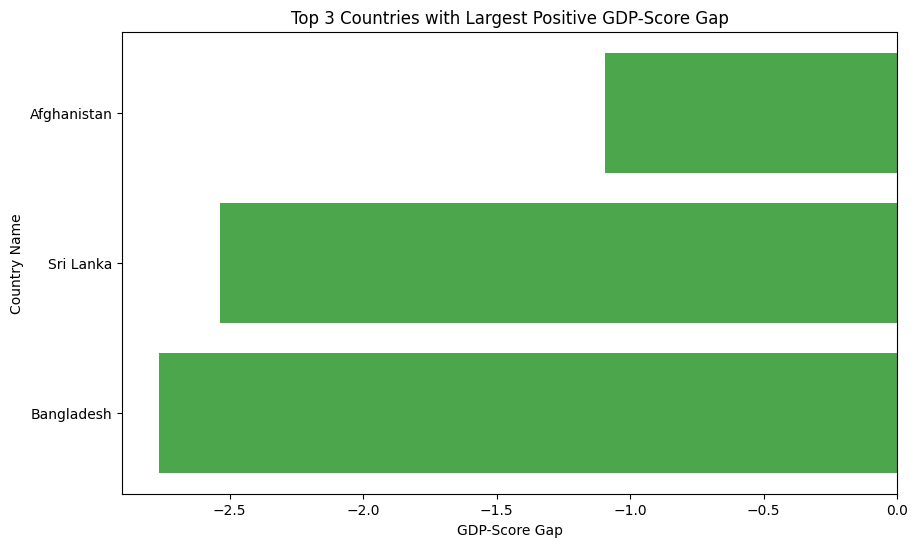

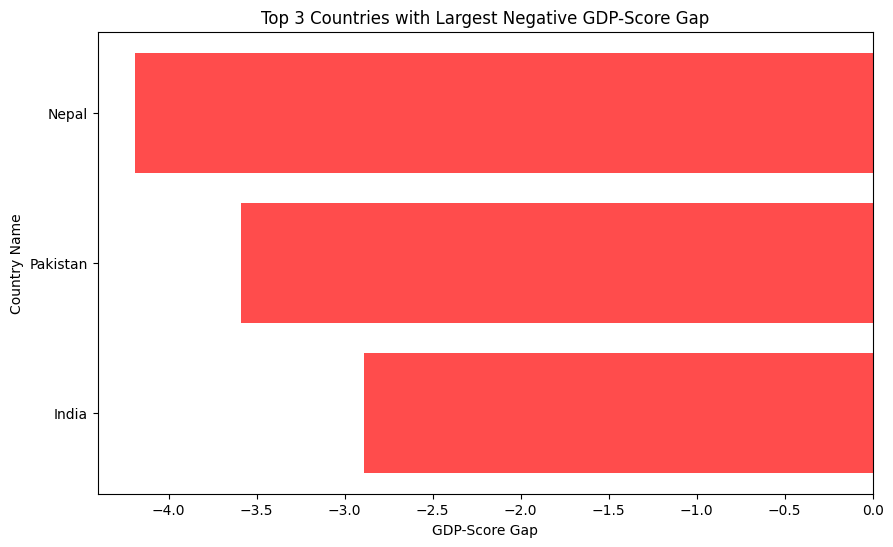

Analysis of GDP-Score Gap:

1. Positive GDP-Score Gap: Countries with large positive gaps have high GDP per capita but relatively low happiness scores.
   This may indicate wealth disparities, lack of social support, or other socio-political factors affecting happiness.

2. Negative GDP-Score Gap: Countries with large negative gaps have relatively low GDP per capita but higher happiness scores.
   This suggests strong social cohesion, cultural factors, or government policies prioritizing well-being over economic growth.

3. Implications: Understanding these gaps helps policymakers identify areas where economic prosperity does not translate to well-being
   and where non-economic factors are driving happiness in South Asian countries.



In [ ]:
import matplotlib.pyplot as plt

# Step 1: Add GDP-Score Gap column
south_asia_df['GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']

# Step 2: Rank countries by GDP-Score Gap
ascending_gap = south_asia_df.sort_values(by='GDP-Score Gap', ascending=True)
descending_gap = south_asia_df.sort_values(by='GDP-Score Gap', ascending=False)

# Display rankings
print("South Asian Countries Ranked by GDP-Score Gap (Ascending):")
print(ascending_gap[['Country name', 'Log GDP per capita', 'score', 'GDP-Score Gap']])

print("\nSouth Asian Countries Ranked by GDP-Score Gap (Descending):")
print(descending_gap[['Country name', 'Log GDP per capita', 'score', 'GDP-Score Gap']])

# Step 3: Highlight top 3 countries with largest positive and negative gaps using bar charts

# Largest positive gaps
top_3_positive_gap = descending_gap.head(3)

# Largest negative gaps
top_3_negative_gap = ascending_gap.head(3)

# Plotting the top 3 positive gaps
plt.figure(figsize=(10, 6))
plt.barh(top_3_positive_gap['Country name'], top_3_positive_gap['GDP-Score Gap'], color='green', alpha=0.7)
plt.title('Top 3 Countries with Largest Positive GDP-Score Gap')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country Name')
plt.gca().invert_yaxis()
plt.show()

# Plotting the top 3 negative gaps
plt.figure(figsize=(10, 6))
plt.barh(top_3_negative_gap['Country name'], top_3_negative_gap['GDP-Score Gap'], color='red', alpha=0.7)
plt.title('Top 3 Countries with Largest Negative GDP-Score Gap')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country Name')
plt.gca().invert_yaxis()
plt.show()

# Step 4: Analyze reasons behind the gaps
print("Analysis of GDP-Score Gap:")
print("""
1. Positive GDP-Score Gap: Countries with large positive gaps have high GDP per capita but relatively low happiness scores.
   This may indicate wealth disparities, lack of social support, or other socio-political factors affecting happiness.

2. Negative GDP-Score Gap: Countries with large negative gaps have relatively low GDP per capita but higher happiness scores.
   This suggests strong social cohesion, cultural factors, or government policies prioritizing well-being over economic growth.

3. Implications: Understanding these gaps helps policymakers identify areas where economic prosperity does not translate to well-being
   and where non-economic factors are driving happiness in South Asian countries.
""")

3.3 problem-3, task-1

South Asia - Mean: 3.90, Std Dev: 1.18
Middle East - Mean: nan, Std Dev: nan
Higher Avg Happiness: Middle East


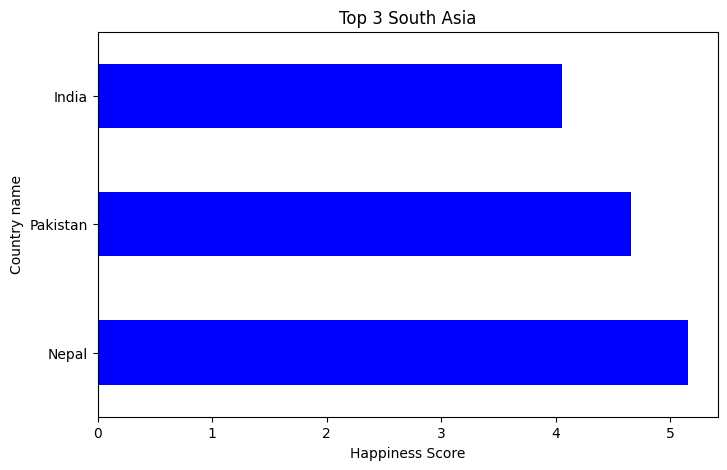

No data available for Top 3 Middle East. Skipping plot.


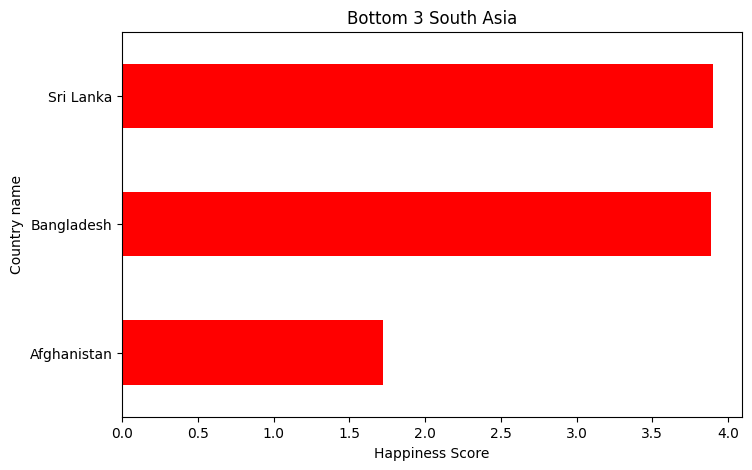

No data available for Bottom 3 Middle East. Skipping plot.


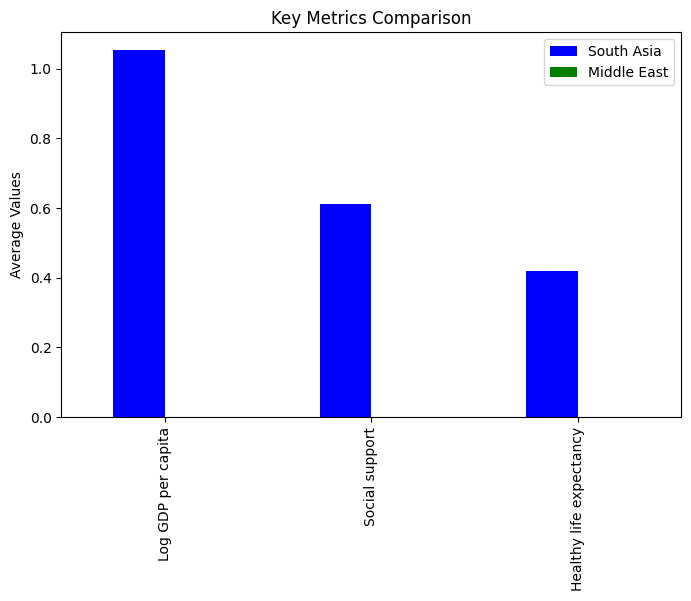

South Asia - Range: 3.44, CV: 0.30
Middle East - Range: nan, CV: nan
Greater Variability: Middle East

Correlation Matrix (South Asia):
                                  score  Freedom to make life choices  \
score                         1.000000                      0.800519   
Freedom to make life choices  0.800519                      1.000000   
Generosity                    0.874512                      0.733396   

                              Generosity  
score                           0.874512  
Freedom to make life choices    0.733396  
Generosity                      1.000000  


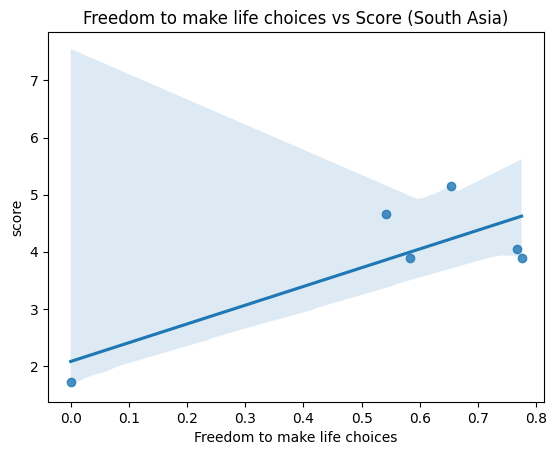

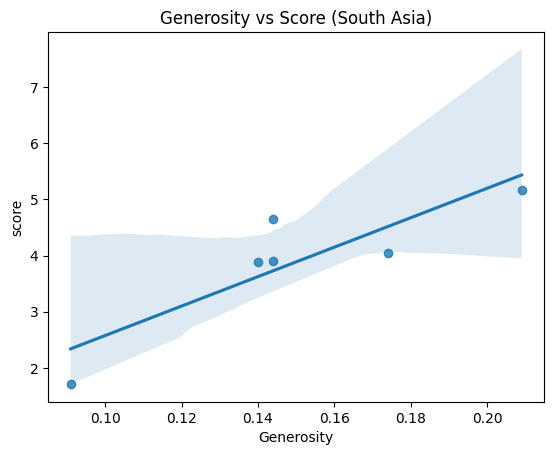

No data available for Middle East Correlation Analysis.


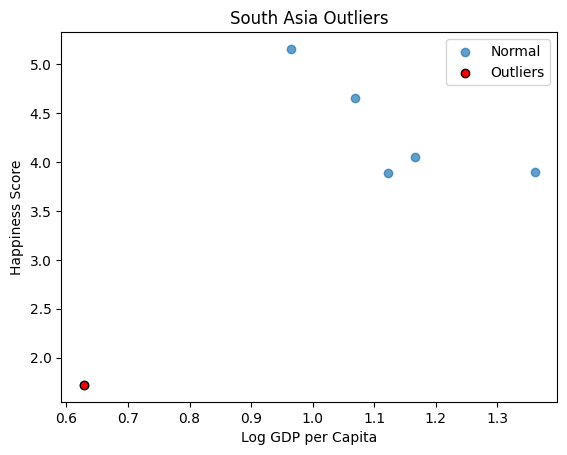

No data or outliers available for Middle East Outliers. Skipping plot.


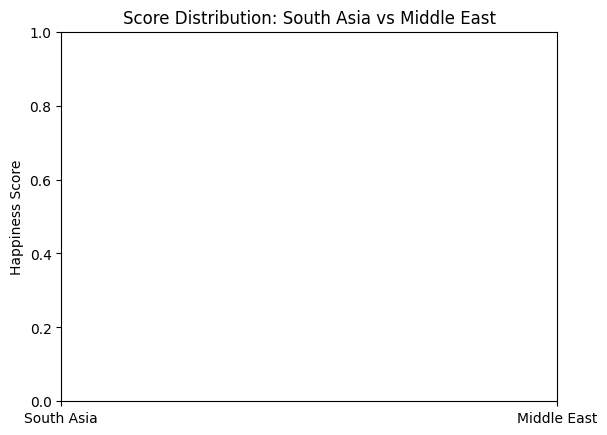

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/MyDrive/Datasets/south_asia_happiness.csv'
df = pd.read_csv(file_path)

# Define regions
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman",
                         "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

# Filter datasets
south_asia_df = df[df['Country name'].isin(south_asian_countries)]
middle_east_df = df[df['Country name'].isin(middle_east_countries)]

# 1. Descriptive Statistics
mean_sa, std_sa = south_asia_df['score'].mean(), south_asia_df['score'].std()
mean_me, std_me = middle_east_df['score'].mean(), middle_east_df['score'].std()
print(f"South Asia - Mean: {mean_sa:.2f}, Std Dev: {std_sa:.2f}")
print(f"Middle East - Mean: {mean_me:.2f}, Std Dev: {std_me:.2f}")
print("Higher Avg Happiness:", "South Asia" if mean_sa > mean_me else "Middle East")

# 2. Top and Bottom Performers
top_3_sa = south_asia_df.nlargest(3, 'score')
bottom_3_sa = south_asia_df.nsmallest(3, 'score')
top_3_me = middle_east_df.nlargest(3, 'score')
bottom_3_me = middle_east_df.nsmallest(3, 'score')

# Function to plot bar charts
def plot_bar(data, title, color):
    if data.empty:
        print(f"No data available for {title}. Skipping plot.")
        return
    data.plot(kind='barh', x='Country name', y='score', color=color, legend=False, figsize=(8, 5))
    plt.title(title)
    plt.xlabel('Happiness Score')
    plt.show()

plot_bar(top_3_sa, 'Top 3 South Asia', 'blue')
plot_bar(top_3_me, 'Top 3 Middle East', 'green')
plot_bar(bottom_3_sa, 'Bottom 3 South Asia', 'red')
plot_bar(bottom_3_me, 'Bottom 3 Middle East', 'orange')

# 3. Metric Comparisons
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
mean_metrics_sa = south_asia_df[metrics].mean()
mean_metrics_me = middle_east_df[metrics].mean()
comparison_df = pd.DataFrame({'South Asia': mean_metrics_sa, 'Middle East': mean_metrics_me})
comparison_df.plot(kind='bar', figsize=(8, 5), color=['blue', 'green'])
plt.title('Key Metrics Comparison')
plt.ylabel('Average Values')
plt.show()

# 4. Happiness Disparity
range_sa, cv_sa = south_asia_df['score'].max() - south_asia_df['score'].min(), south_asia_df['score'].std() / south_asia_df['score'].mean()
range_me, cv_me = middle_east_df['score'].max() - middle_east_df['score'].min(), middle_east_df['score'].std() / middle_east_df['score'].mean()
print(f"South Asia - Range: {range_sa:.2f}, CV: {cv_sa:.2f}")
print(f"Middle East - Range: {range_me:.2f}, CV: {cv_me:.2f}")
print("Greater Variability:", "South Asia" if cv_sa > cv_me else "Middle East")

# 5. Correlation Analysis
for region_name, data in [('South Asia', south_asia_df), ('Middle East', middle_east_df)]:
    if data.empty:
        print(f"No data available for {region_name} Correlation Analysis.")
        continue
    corr = data[['score', 'Freedom to make life choices', 'Generosity']].corr()
    print(f"\nCorrelation Matrix ({region_name}):\n", corr)
    for metric in ['Freedom to make life choices', 'Generosity']:
        sns.regplot(x=metric, y='score', data=data)
        plt.title(f'{metric} vs Score ({region_name})')
        plt.show()

# 6. Outlier Detection
def detect_outliers(df, column):
    Q1, Q3 = df[column].quantile(0.25), df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)]

outliers_sa = detect_outliers(south_asia_df, 'score')
outliers_me = detect_outliers(middle_east_df, 'score')

# Scatter plot with outliers
def plot_outliers(data, outliers, title):
    if data.empty or outliers.empty:
        print(f"No data or outliers available for {title}. Skipping plot.")
        return
    plt.scatter(data['Log GDP per capita'], data['score'], label='Normal', alpha=0.7)
    plt.scatter(outliers['Log GDP per capita'], outliers['score'], color='red', label='Outliers', edgecolor='black')
    plt.title(title)
    plt.xlabel('Log GDP per Capita')
    plt.ylabel('Happiness Score')
    plt.legend()
    plt.show()

plot_outliers(south_asia_df, outliers_sa, 'South Asia Outliers')
plot_outliers(middle_east_df, outliers_me, 'Middle East Outliers')

# 7. Boxplots
sns.boxplot(data=[south_asia_df['score'], middle_east_df['score']], notch=True, palette=['blue', 'green'])
plt.xticks([0, 1], ['South Asia', 'Middle East'])
plt.title('Score Distribution: South Asia vs Middle East')
plt.ylabel('Happiness Score')
plt.show()
